<center>
    
    
# Part 5: Capstone Classification Model

- **Predicting Footballers Market Values**
 
- **Using 2008 - 2017 data from transfermarkt.co.uk**
 
- **Christopher Williams, ATX, GA DSI Feb 2019**
 
</center>



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-5:-Capstone-Classification-Model" data-toc-modified-id="Part-5:-Capstone-Classification-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 5: Capstone Classification Model</a></span><ul class="toc-item"><li><span><a href="#The-data-science-process." data-toc-modified-id="The-data-science-process.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The data science process.</a></span></li><li><span><a href="#Define-the-problem." data-toc-modified-id="Define-the-problem.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Define the problem.</a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Import libraries</a></span></li></ul></li><li><span><a href="#Import-dataframe-df_master.csv-and-rename-as-df" data-toc-modified-id="Import-dataframe-df_master.csv-and-rename-as-df-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import dataframe df_master.csv and rename as df</a></span></li><li><span><a href="#Explore-the-data." data-toc-modified-id="Explore-the-data.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore the data.</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#About-the-data:" data-toc-modified-id="About-the-data:-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>About the data:</a></span><ul class="toc-item"><li><span><a href="#Market-Value-Info" data-toc-modified-id="Market-Value-Info-3.0.1.1"><span class="toc-item-num">3.0.1.1&nbsp;&nbsp;</span>Market Value Info</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Classification-Models-on-Position" data-toc-modified-id="Classification-Models-on-Position-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Classification Models on Position</a></span><ul class="toc-item"><li><span><a href="#Exploring-the-SVC-Model" data-toc-modified-id="Exploring-the-SVC-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exploring the SVC Model</a></span></li></ul></li><li><span><a href="#End" data-toc-modified-id="End-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>End</a></span></li></ul></div>



## The data science process.

>1. Define the problem.
>2. Gather the data.
>3. Explore the data.
>4. Model the data.
>5. Evaluate the model.
>6. Answer the problem.

>- In this jupyter notebook, I'm going address steps 4, 5, and 6 to determine which models and subsets of data are appropriate to optimize. 

>- See Capstone Data Collection jupyter notebook to learn how the data was collected. 


## Define the problem.


Classification model:
- **Classification: Using market values and footballer's stats, how accurately can you classify if one is a forward, defender, midfielder or goalie?**
- I will pull in the cleaned csv of data gathered via scraping the webpages and focus mostly on creating and then comparing classification models to see what we can learn from the data and how much the data can be used to predict a player's position based on transfermarkt's player annual statistics. 


## Import libraries


In [1]:
# # To display at max window width
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Imports

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup 
from time import sleep
from selenium import webdriver
import os
import sys
import sqlalchemy
import re
import psycopg2 as pg2

import numpy as np
import patsy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

# Import dataframe df_master.csv and rename as df

In [3]:
df = pd.read_csv('df_master.csv')
df = df.drop(columns='Unnamed: 0', axis=1)
df.head(2)

,player,current_team,current_year,birthdate_age,nationality,height_m,foot,date_joined,year_joined,signed_from,transfer_fee,contract_until,market_value,number,position,general_position,age,in_squad,appearances,goals,assists,yellow_card,second_yellow,red_cards,substituted_on,substituted_off,ppm,minutes_played
0,Víctor Valdés,fc-barcelona,2008,"Jan 14, 1982 (26)",Spain,1.83,right,"Jul 1, 2002",2002,FC Barcelona B,0.0,-,13500000.0,1,Goalkeeper,Goalkeeper,26.0,52.0,49.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.35,4410.0
1,José Manuel Pinto,fc-barcelona,2008,"Nov 8, 1975 (32)",Spain,1.85,right,"Jul 1, 2008",2008,Spain,0.0,-,1800000.0,13,Goalkeeper,Goalkeeper,32.0,51.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.18,990.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21570 entries, 0 to 21569
Data columns (total 28 columns):
player              21570 non-null object
current_team        21570 non-null object
current_year        21570 non-null int64
birthdate_age       21570 non-null object
nationality         21570 non-null object
height_m            21570 non-null float64
foot                21570 non-null object
date_joined         21570 non-null object
year_joined         21570 non-null object
signed_from         21570 non-null object
transfer_fee        21570 non-null float64
contract_until      21570 non-null object
market_value        21570 non-null float64
number              21570 non-null int64
position            21570 non-null object
general_position    21570 non-null object
age                 21570 non-null float64
in_squad            21570 non-null float64
appearances         21570 non-null float64
goals               21570 non-null float64
assists             21570 non-null float64
yel

# Explore the data.

##### We are attempting to predict market value by using the players stats features.

### About the data:
 
>- Market & Transfer Value are in pounds sterling
- Height is in meters
- PPM is player preferred moves (which could be a proxy for players position, moves and habits). 


Features used in model to predict:
- Age
- Market -Value (not included when target)
- Transfer-Fee (not included when target)
- In-Squad (included on bench) 
- Appearances (games played)
- Goals
- Assists
- Yellow Cards
- Second Yellow Cards
- Red Cards
- Substituted On
- Substituted Off
- PPM
- Minutes Played


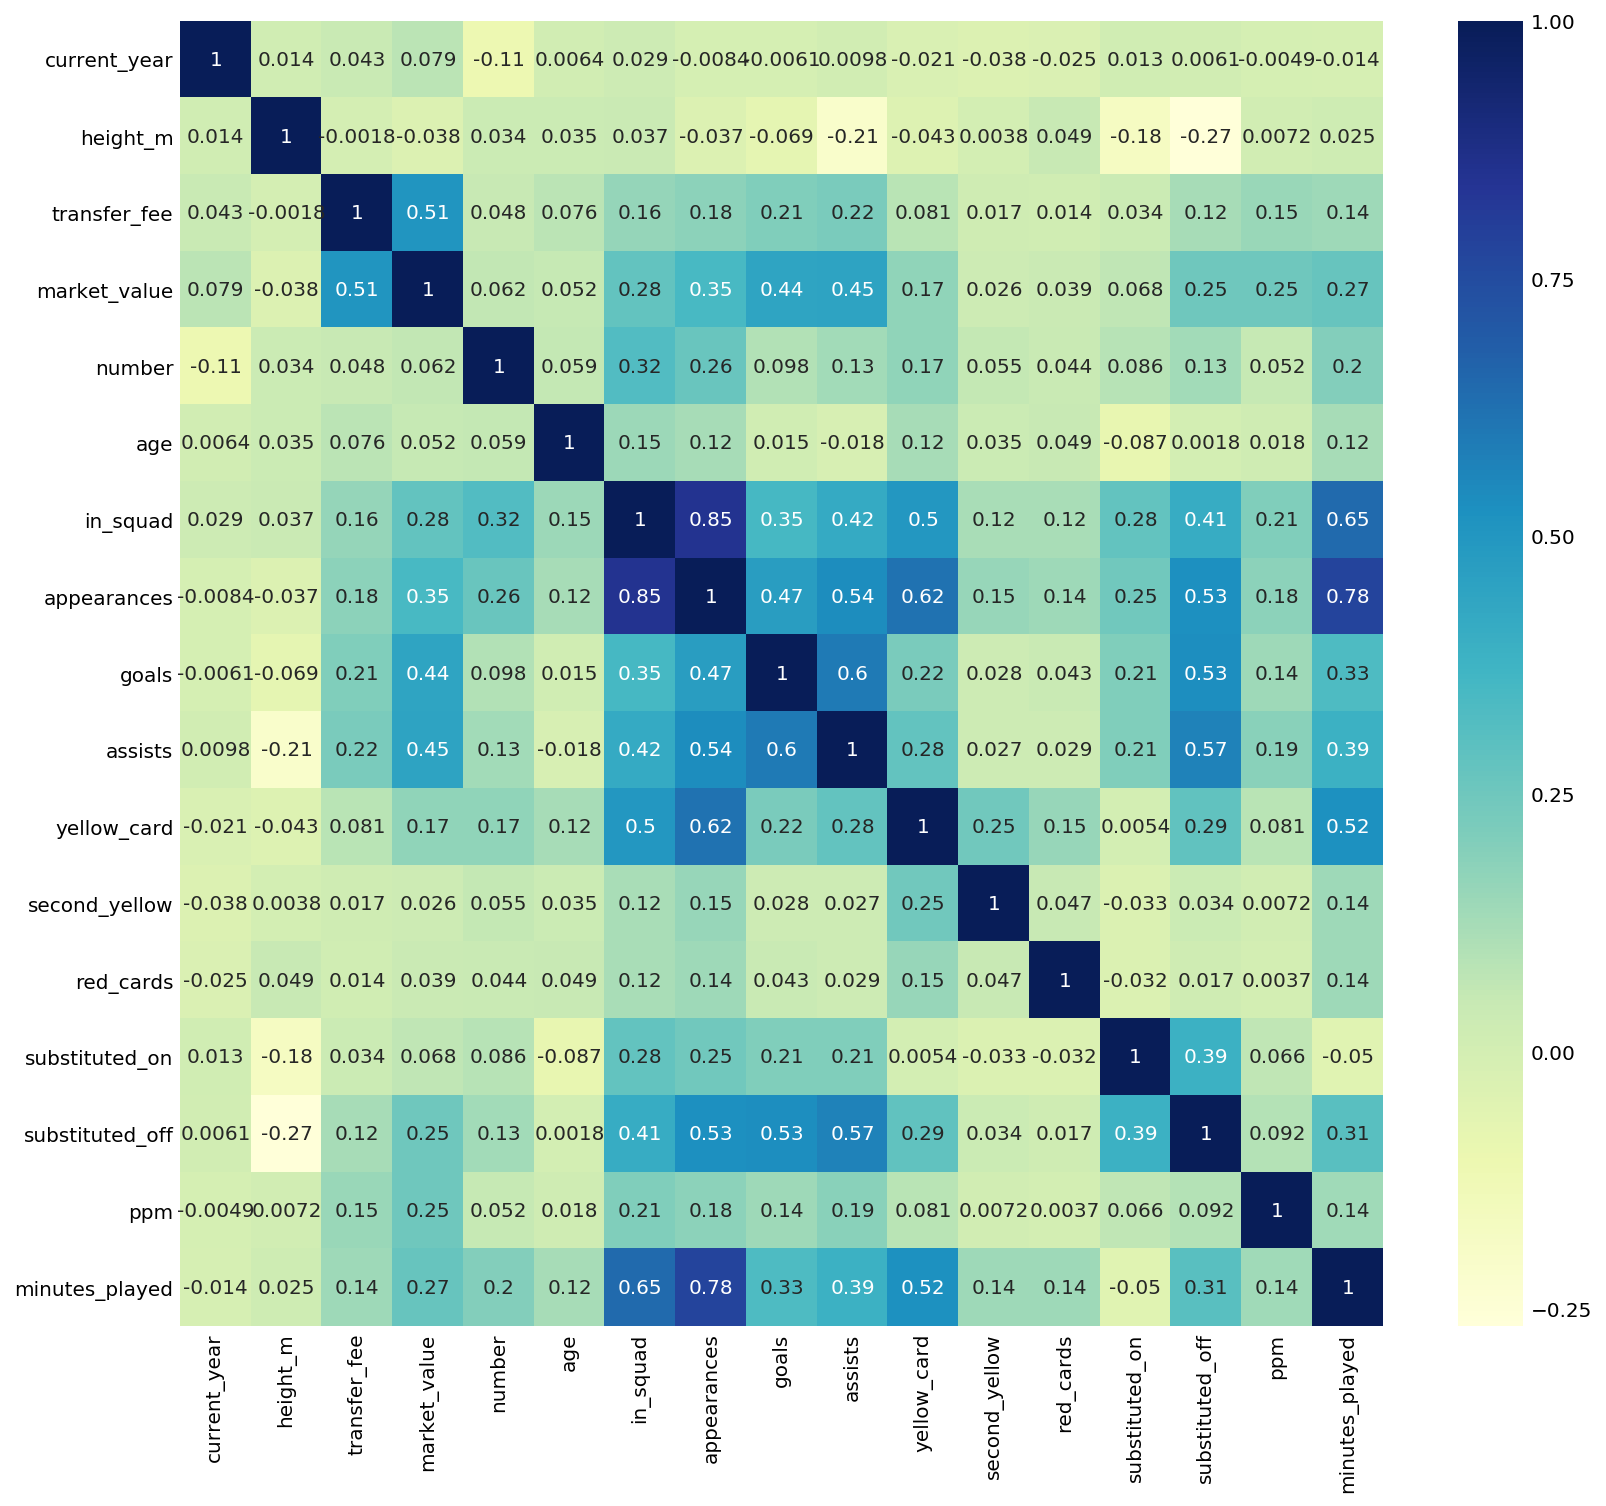

In [5]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
current_year,21570.0,2.012735e+03,2.929718e+00,2008.00,2010.00,2012.00,2015.00,2.017000e+03
height_m,21570.0,1.821707e+00,6.457274e-02,0.17,1.78,1.83,1.87,2.040000e+00
transfer_fee,21570.0,1.148156e+06,4.662077e+06,0.00,0.00,0.00,0.00,9.090000e+07
market_value,21570.0,4.412661e+06,7.315357e+06,23000.00,675000.00,1800000.00,4730000.00,1.080000e+08
number,21570.0,-7.322188e+01,2.905640e+02,-999.00,6.00,14.00,23.00,9.900000e+01
age,21570.0,2.551145e+01,4.292170e+00,16.00,22.00,25.00,29.00,4.200000e+01
in_squad,21570.0,2.947413e+01,1.414995e+01,0.00,18.00,32.00,40.00,6.800000e+01
appearances,21570.0,2.307997e+01,1.432896e+01,1.00,10.00,23.00,35.00,7.600000e+01
goals,21570.0,2.504729e+00,4.697557e+00,0.00,0.00,1.00,3.00,7.300000e+01
assists,21570.0,1.952666e+00,3.096413e+00,0.00,0.00,1.00,3.00,3.500000e+01


In [7]:
df.shape

(21570, 28)

In [8]:
# Number of unique players
len(df['player'].value_counts())

7090

In [9]:
df['goals'].mean()

2.5047287899860917

In [10]:
df.sort_values(by='goals', ascending=False).head(5)

,player,current_team,current_year,birthdate_age,nationality,height_m,foot,date_joined,year_joined,signed_from,transfer_fee,contract_until,market_value,number,position,general_position,age,in_squad,appearances,goals,assists,yellow_card,second_yellow,red_cards,substituted_on,substituted_off,ppm,minutes_played
6176,Lionel Messi,fc-barcelona,2011,"Jun 24, 1987 (24)",Argentina,1.70,left,"Jul 1, 2005",2005,FC Barcelona,0.0,30.06.2021,90000000.0,10,Right Winger,Forward,24.0,60.0,60.0,73.0,29.0,9.0,0.0,0.0,3.0,0.0,2.37,5221.0
6198,Cristiano Ronaldo,real-madrid,2011,"Feb 5, 1985 (26)",Portugal,1.87,both,"Jul 1, 2009",2009,Manchester United,84600000.0,30.06.2021,81000000.0,7,Left Winger,Forward,26.0,56.0,55.0,60.0,15.0,7.0,0.0,0.0,1.0,3.0,2.42,4902.0
8610,Lionel Messi,fc-barcelona,2012,"Jun 24, 1987 (25)",Argentina,1.70,left,"Jul 1, 2005",2005,FC Barcelona,0.0,30.06.2021,90000000.0,10,Right Winger,Forward,25.0,52.0,50.0,60.0,15.0,2.0,0.0,0.0,6.0,4.0,2.22,4070.0
13811,Luis Suárez,fc-barcelona,2015,"Jan 24, 1987 (28)",Uruguay,1.82,right,"Jul 11, 2014",2014,FC Barcelona,0.0,30.06.2021,54000000.0,9,Centre-Forward,Forward,28.0,57.0,53.0,59.0,24.0,10.0,0.0,0.0,0.0,1.0,2.43,4766.0
8633,Cristiano Ronaldo,real-madrid,2012,"Feb 5, 1985 (27)",Portugal,1.87,both,"Jul 1, 2009",2009,Manchester United,84600000.0,30.06.2021,81000000.0,7,Left Winger,Forward,27.0,56.0,55.0,55.0,13.0,13.0,0.0,1.0,4.0,5.0,2.04,4631.0


In [11]:
df['appearances'].mean()

23.079972183588318

In [12]:
df['age'].mean()

25.511451089476125

In [13]:
df.sort_values(by='age', ascending=False).head(5)

,player,current_team,current_year,birthdate_age,nationality,height_m,foot,date_joined,year_joined,signed_from,transfer_fee,contract_until,market_value,number,position,general_position,age,in_squad,appearances,goals,assists,yellow_card,second_yellow,red_cards,substituted_on,substituted_off,ppm,minutes_played
15966,Mark Schwarzer,leicester-city,2015,"Oct 6, 1972 (42)",Australia,1.94,right,"Jan 6, 2015",2014,Retired,0.0,-,450000.0,32,Goalkeeper,Goalkeeper,42.0,42.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00,330.0
13422,Mark Schwarzer,leicester-city,2014,"Oct 6, 1972 (41)",Australia,1.94,right,"Jan 6, 2015",2014,Australia,0.0,-,900000.0,32,Goalkeeper,Goalkeeper,41.0,20.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63,720.0
10540,Brad Friedel,tottenham-hotspur,2012,"May 18, 1971 (41)",United States,1.91,right,"Jul 1, 2011",2011,Aston Villa,0.0,-,900000.0,24,Goalkeeper,Goalkeeper,41.0,47.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.55,1830.0
10759,David James,afc-bournemouth,2012,"Aug 1, 1970 (41)",England,1.93,right,"Sep 28, 2012",2012,England,0.0,-,225000.0,34,Goalkeeper,Goalkeeper,41.0,23.0,19.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.84,1710.0
863,Paolo Maldini,ac-mailand,2008,"Jun 26, 1968 (40)",Italy,1.86,both,"Jul 1, 1985",1985,Milan Primavera,0.0,-,1800000.0,3,Centre-Back,Defender,40.0,37.0,32.0,0.0,1.0,6.0,0.0,0.0,1.0,2.0,1.84,2781.0


In [14]:
df.sort_values(by='appearances', ascending=False).head(5)

,player,current_team,current_year,birthdate_age,nationality,height_m,foot,date_joined,year_joined,signed_from,transfer_fee,contract_until,market_value,number,position,general_position,age,in_squad,appearances,goals,assists,yellow_card,second_yellow,red_cards,substituted_on,substituted_off,ppm,minutes_played
4004,Enrique de Lucas,celta-vigo,2010,"Aug 17, 1978 (31)",Spain,1.74,right,"Jul 1, 2010",2010,Spain,0.0,-,900000.0,22,Attacking Midfield,Midfielder,31.0,39.0,76.0,18.0,0.0,22.0,0.0,0.0,11.0,41.0,0.83,5382.0
4009,David Rodríguez,celta-vigo,2010,"Feb 14, 1986 (24)",Spain,1.80,right,"Jul 1, 2010",2010,Spain,0.0,-,1080000.0,18,Centre-Forward,Forward,24.0,42.0,74.0,36.0,0.0,12.0,0.0,0.0,2.0,49.0,0.84,5774.0
4006,Dani Abalo,celta-vigo,2010,"Sep 29, 1987 (22)",Spain,1.77,right,"Jul 1, 2005",2005,Celta Vigo B,0.0,-,1080000.0,7,Right Winger,Forward,22.0,43.0,69.0,7.0,0.0,5.0,0.0,0.0,51.0,16.0,0.80,2172.0
4008,Michu,celta-vigo,2010,"Mar 21, 1986 (24)",Spain,1.85,left,"Mar 1, 2008",2007,Celta Vigo B,0.0,-,720000.0,5,Second Striker,Forward,24.0,45.0,66.0,13.0,0.0,5.0,0.0,0.0,28.0,19.0,0.73,3628.0
10529,Juan Mata,fc-chelsea,2012,"Apr 28, 1988 (24)",Spain,1.70,left,"Aug 24, 2011",2011,Valencia CF,24030000.0,-,34200000.0,10,Attacking Midfield,Midfielder,24.0,65.0,64.0,19.0,35.0,4.0,0.0,0.0,9.0,30.0,1.97,4909.0


#### Market Value Info

In [15]:
# What's average market value
round(df['market_value'].mean(),0)

4412661.0

In [16]:
# What's median market value
round(df['market_value'].median(),0)

1800000.0

In [17]:
df.sort_values(by='market_value', ascending=False).head(5)

,player,current_team,current_year,birthdate_age,nationality,height_m,foot,date_joined,year_joined,signed_from,transfer_fee,contract_until,market_value,number,position,general_position,age,in_squad,appearances,goals,assists,yellow_card,second_yellow,red_cards,substituted_on,substituted_off,ppm,minutes_played
13809,Lionel Messi,fc-barcelona,2015,"Jun 24, 1987 (28)",Argentina,1.70,left,"Jul 1, 2005",2005,FC Barcelona,0.0,30.06.2021,108000000.0,10,Right Winger,Forward,28.0,49.0,49.0,41.0,23.0,5.0,0.0,0.0,2.0,2.0,2.35,4229.0
13831,Cristiano Ronaldo,real-madrid,2015,"Feb 5, 1985 (30)",Portugal,1.87,both,"Jul 1, 2009",2009,Manchester United,84600000.0,30.06.2021,108000000.0,7,Left Winger,Forward,30.0,48.0,48.0,51.0,15.0,3.0,0.0,0.0,0.0,4.0,2.40,4293.0
16367,Lionel Messi,fc-barcelona,2016,"Jun 24, 1987 (29)",Argentina,1.70,left,"Jul 1, 2005",2005,FC Barcelona,0.0,30.06.2021,108000000.0,10,Right Winger,Forward,29.0,52.0,52.0,54.0,16.0,9.0,0.0,0.0,2.0,4.0,2.33,4452.0
11042,Lionel Messi,fc-barcelona,2013,"Jun 24, 1987 (26)",Argentina,1.70,left,"Jul 1, 2005",2005,FC Barcelona,0.0,30.06.2021,108000000.0,10,Right Winger,Forward,26.0,47.0,46.0,41.0,14.0,3.0,0.0,0.0,3.0,6.0,2.13,3742.0
18968,Lionel Messi,fc-barcelona,2017,"Jun 24, 1987 (30)",Argentina,1.70,left,"Jul 1, 2005",2005,FC Barcelona,0.0,30.06.2021,108000000.0,10,Right Winger,Forward,30.0,54.0,54.0,45.0,18.0,7.0,0.0,0.0,6.0,1.0,2.33,4468.0


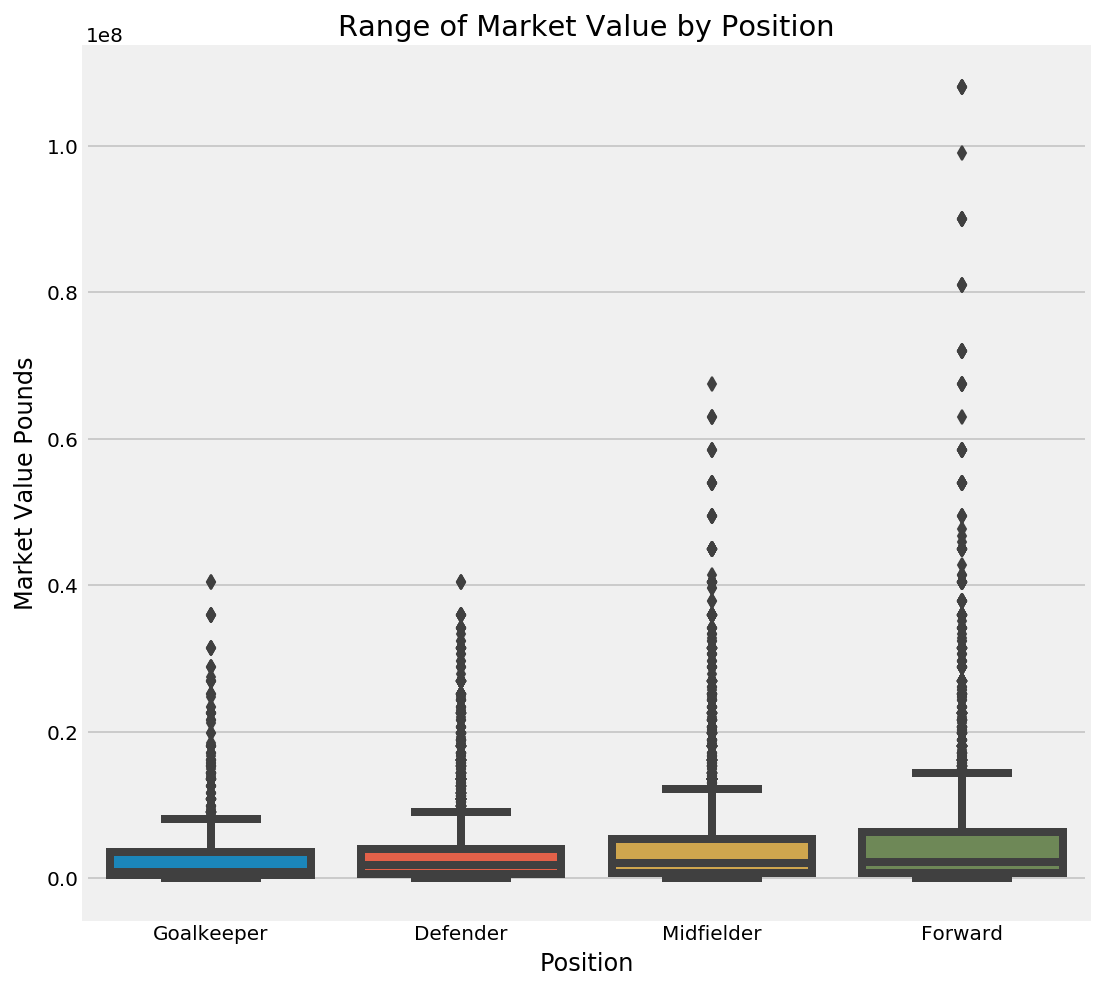

In [18]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df['general_position'], y=df['market_value'])
plt.xlabel('Position')
plt.ylabel('Market Value Pounds')
plt.title('Range of Market Value by Position');

In [19]:
# Imports

import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, mean_absolute_error, median_absolute_error 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Classification Models on Position


- Predict whether or not one is a forward, midfielder, defender or goalkeeper (using general_position column)


In [20]:
df.columns

Index(['player', 'current_team', 'current_year', 'birthdate_age',
       'nationality', 'height_m', 'foot', 'date_joined', 'year_joined',
       'signed_from', 'transfer_fee', 'contract_until', 'market_value',
       'number', 'position', 'general_position', 'age', 'in_squad',
       'appearances', 'goals', 'assists', 'yellow_card', 'second_yellow',
       'red_cards', 'substituted_on', 'substituted_off', 'ppm',
       'minutes_played'],
      dtype='object')

In [21]:
df.select_dtypes(include=['float64', 'int64', 'uint8']).columns

Index(['current_year', 'height_m', 'transfer_fee', 'market_value', 'number',
       'age', 'in_squad', 'appearances', 'goals', 'assists', 'yellow_card',
       'second_yellow', 'red_cards', 'substituted_on', 'substituted_off',
       'ppm', 'minutes_played'],
      dtype='object')

In [22]:
# Imports

import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, mean_absolute_error, median_absolute_error 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import PowerTransformer
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import roc_curve, f1_score, accuracy_score

In [23]:
df.columns

Index(['player', 'current_team', 'current_year', 'birthdate_age',
       'nationality', 'height_m', 'foot', 'date_joined', 'year_joined',
       'signed_from', 'transfer_fee', 'contract_until', 'market_value',
       'number', 'position', 'general_position', 'age', 'in_squad',
       'appearances', 'goals', 'assists', 'yellow_card', 'second_yellow',
       'red_cards', 'substituted_on', 'substituted_off', 'ppm',
       'minutes_played'],
      dtype='object')

In [24]:
df.head()

,player,current_team,current_year,birthdate_age,nationality,height_m,foot,date_joined,year_joined,signed_from,transfer_fee,contract_until,market_value,number,position,general_position,age,in_squad,appearances,goals,assists,yellow_card,second_yellow,red_cards,substituted_on,substituted_off,ppm,minutes_played
0,Víctor Valdés,fc-barcelona,2008,"Jan 14, 1982 (26)",Spain,1.83,right,"Jul 1, 2002",2002,FC Barcelona B,0.0,-,13500000.0,1,Goalkeeper,Goalkeeper,26.0,52.0,49.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.35,4410.0
1,José Manuel Pinto,fc-barcelona,2008,"Nov 8, 1975 (32)",Spain,1.85,right,"Jul 1, 2008",2008,Spain,0.0,-,1800000.0,13,Goalkeeper,Goalkeeper,32.0,51.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.18,990.0
2,Albert Jorquera,fc-barcelona,2008,"Mar 3, 1979 (29)",Spain,1.83,right,"Jul 1, 2003",2003,FC Barcelona B,0.0,-,720000.0,25,Goalkeeper,Goalkeeper,29.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,90.0
3,Oier Olazábal,fc-barcelona,2008,"Sep 14, 1989 (18)",Spain,1.89,left,"Aug 1, 2007",2007,FC Barcelona B,0.0,-,540000.0,-999,Goalkeeper,Goalkeeper,18.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,90.0
4,Carles Puyol,fc-barcelona,2008,"Apr 13, 1978 (30)",Spain,1.78,right,"Jul 1, 1999",1999,FC Barcelona B,0.0,-,23400000.0,5,Centre-Back,Defender,30.0,49.0,45.0,1.0,3.0,8.0,0.0,0.0,4.0,6.0,2.29,3768.0


In [25]:
df['general_position'].value_counts()

Defender      7251
Midfielder    6469
Forward       5995
Goalkeeper    1855
Name: general_position, dtype: int64

In [26]:
df_class = df.copy()
df_class.head(2)

,player,current_team,current_year,birthdate_age,nationality,height_m,foot,date_joined,year_joined,signed_from,transfer_fee,contract_until,market_value,number,position,general_position,age,in_squad,appearances,goals,assists,yellow_card,second_yellow,red_cards,substituted_on,substituted_off,ppm,minutes_played
0,Víctor Valdés,fc-barcelona,2008,"Jan 14, 1982 (26)",Spain,1.83,right,"Jul 1, 2002",2002,FC Barcelona B,0.0,-,13500000.0,1,Goalkeeper,Goalkeeper,26.0,52.0,49.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.35,4410.0
1,José Manuel Pinto,fc-barcelona,2008,"Nov 8, 1975 (32)",Spain,1.85,right,"Jul 1, 2008",2008,Spain,0.0,-,1800000.0,13,Goalkeeper,Goalkeeper,32.0,51.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.18,990.0


In [27]:
dict_map_of_general_positions = {'Forward':1,'Midfielder':2,'Defender':3, 'Goalkeeper':4}

In [28]:
df_class['general_position_mapped'] = df_class['general_position'].map(dict_map_of_general_positions).astype(float)

In [29]:
df_class['general_position_mapped'].dtypes

dtype('float64')

In [30]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21570 entries, 0 to 21569
Data columns (total 29 columns):
player                     21570 non-null object
current_team               21570 non-null object
current_year               21570 non-null int64
birthdate_age              21570 non-null object
nationality                21570 non-null object
height_m                   21570 non-null float64
foot                       21570 non-null object
date_joined                21570 non-null object
year_joined                21570 non-null object
signed_from                21570 non-null object
transfer_fee               21570 non-null float64
contract_until             21570 non-null object
market_value               21570 non-null float64
number                     21570 non-null int64
position                   21570 non-null object
general_position           21570 non-null object
age                        21570 non-null float64
in_squad                   21570 non-null float64
appear

In [31]:
Xc = df_class[['transfer_fee', 'age', 'in_squad', 'appearances', 'goals', 'assists', 'yellow_card', 'second_yellow',
       'red_cards', 'substituted_on', 'substituted_off', 'ppm', 'minutes_played']]
yc = df_class['general_position_mapped']

In [33]:
# Define Function to Run and Plot Models



def run_and_plot_classification_model(model):
    X_train, X_test, y_train, y_test = train_test_split(Xc, yc, random_state=42)
    #ss = PowerTransformer()
    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)

    name = str(model).split('(')[0] + ' model'
    model.fit(X_train_sc, y_train)

    train_predictions = model.predict(X_train_sc)
    train_residuals = y_train - train_predictions

    X_test_sc = ss.transform(X_test)
    predictions = model.predict(X_test_sc)

    print(f"{name} Training Accuracy Score: {round(accuracy_score(train_predictions, y_train),3)}")
    print(f"{name} Testing Accuracy Score: {round(accuracy_score(y_test, predictions),3)}")


In [35]:
Xc = df_class[['market_value','transfer_fee', 'age', 'height_m', 'in_squad', 'appearances', 'goals', 'assists', 'yellow_card', 'second_yellow',
       'red_cards', 'substituted_on', 'substituted_off', 'ppm', 'minutes_played']]
yc = df_class['general_position_mapped']


for mod in [LogisticRegression(),   
            DecisionTreeClassifier(),
            BaggingClassifier(),
            KNeighborsClassifier(),
            RandomForestClassifier(),
            AdaBoostClassifier(),
            SVC(probability=True)
            ]:
    
    run_and_plot_classification_model(mod)
    print(" ")


LogisticRegression model Training Accuracy Score: 0.696
LogisticRegression model Testing Accuracy Score: 0.702
 
DecisionTreeClassifier model Training Accuracy Score: 1.0
DecisionTreeClassifier model Testing Accuracy Score: 0.628
 
BaggingClassifier model Training Accuracy Score: 0.985
BaggingClassifier model Testing Accuracy Score: 0.692
 
KNeighborsClassifier model Training Accuracy Score: 0.766
KNeighborsClassifier model Testing Accuracy Score: 0.654
 
RandomForestClassifier model Training Accuracy Score: 0.988
RandomForestClassifier model Testing Accuracy Score: 0.694
 
AdaBoostClassifier model Training Accuracy Score: 0.597
AdaBoostClassifier model Testing Accuracy Score: 0.597
 
SVC model Training Accuracy Score: 0.755
SVC model Testing Accuracy Score: 0.74
 


In [36]:
Xc = df_class[['transfer_fee', 'age', 'height_m','in_squad', 'appearances', 'goals', 'assists', 'yellow_card', 'second_yellow',
       'red_cards', 'substituted_on', 'substituted_off', 'ppm', 'minutes_played']]
yc = df_class['general_position_mapped']


for mod in [LogisticRegression(),   
            DecisionTreeClassifier(),
            BaggingClassifier(),
            KNeighborsClassifier(),
            RandomForestClassifier(),
            AdaBoostClassifier(),
            SVC(probability=True)
            ]:
    
    run_and_plot_classification_model(mod)
    print(" ")


LogisticRegression model Training Accuracy Score: 0.696
LogisticRegression model Testing Accuracy Score: 0.704
 
DecisionTreeClassifier model Training Accuracy Score: 1.0
DecisionTreeClassifier model Testing Accuracy Score: 0.62
 
BaggingClassifier model Training Accuracy Score: 0.984
BaggingClassifier model Testing Accuracy Score: 0.697
 
KNeighborsClassifier model Training Accuracy Score: 0.765
KNeighborsClassifier model Testing Accuracy Score: 0.653
 
RandomForestClassifier model Training Accuracy Score: 0.985
RandomForestClassifier model Testing Accuracy Score: 0.688
 
AdaBoostClassifier model Training Accuracy Score: 0.598
AdaBoostClassifier model Testing Accuracy Score: 0.597
 
SVC model Training Accuracy Score: 0.752
SVC model Testing Accuracy Score: 0.738
 


In [37]:
Xc = df_class[['in_squad', 'appearances', 'goals', 'assists', 'yellow_card', 'second_yellow',
       'red_cards', 'substituted_on', 'substituted_off', 'ppm', 'minutes_played']]
yc = df_class['general_position_mapped']


for mod in [LogisticRegression(),   
            DecisionTreeClassifier(),
            BaggingClassifier(),
            KNeighborsClassifier(),
            RandomForestClassifier(),
            AdaBoostClassifier(),
            SVC(probability=True)
            ]:
    
    run_and_plot_classification_model(mod)
    print(" ")


LogisticRegression model Training Accuracy Score: 0.69
LogisticRegression model Testing Accuracy Score: 0.698
 
DecisionTreeClassifier model Training Accuracy Score: 0.993
DecisionTreeClassifier model Testing Accuracy Score: 0.62
 
BaggingClassifier model Training Accuracy Score: 0.977
BaggingClassifier model Testing Accuracy Score: 0.686
 
KNeighborsClassifier model Training Accuracy Score: 0.77
KNeighborsClassifier model Testing Accuracy Score: 0.668
 
RandomForestClassifier model Training Accuracy Score: 0.978
RandomForestClassifier model Testing Accuracy Score: 0.679
 
AdaBoostClassifier model Training Accuracy Score: 0.556
AdaBoostClassifier model Testing Accuracy Score: 0.561
 
SVC model Training Accuracy Score: 0.733
SVC model Testing Accuracy Score: 0.722
 


## Exploring the SVC Model

In [38]:
# Define Function to Run and Plot Models


Xc = df_class[['in_squad', 'appearances', 'goals', 'assists', 'yellow_card', 'second_yellow',
       'red_cards', 'substituted_on', 'substituted_off', 'ppm', 'minutes_played']]
yc = df_class['general_position_mapped']

model = SVC(probability=True)

X_train, X_test, y_train, y_test = train_test_split(Xc, yc, random_state=42)
#ss = PowerTransformer()
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)

name = str(model).split('(')[0] + ' model'
model.fit(X_train_sc, y_train)

train_predictions = model.predict(X_train_sc)
train_residuals = y_train - train_predictions

X_test_sc = ss.transform(X_test)
predictions = model.predict(X_test_sc)

print(f"{name} Training Accuracy Score: {round(accuracy_score(train_predictions, y_train),3)}")
print(f"{name} Testing Accuracy Score: {round(accuracy_score(y_test, predictions),3)}")


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

SVC model Training Accuracy Score: 0.733
SVC model Testing Accuracy Score: 0.722


In [42]:
model.predict_proba

<bound method BaseSVC._predict_proba of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)>

In [43]:
model.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)>

In [45]:
len(predictions)

5393

In [47]:
len(y_test)

5393

In [98]:
y_test[:20]

18432    1.0
12617    1.0
18000    3.0
12503    4.0
3171     4.0
1747     3.0
20843    3.0
5477     3.0
2498     2.0
19011    2.0
1056     1.0
18807    3.0
19546    3.0
20707    1.0
5654     3.0
18828    4.0
2638     2.0
10902    4.0
7515     4.0
19010    2.0
Name: general_position_mapped, dtype: float64

In [130]:
y_test_df = pd.DataFrame(np.array(y_test))
y_test_df.head()

,0
0,1.0
1,1.0
2,3.0
3,4.0
4,4.0


In [57]:
predictions[:20]

array([2., 1., 3., 4., 4., 3., 3., 3., 1., 2., 1., 3., 2., 1., 3., 4., 2.,
       4., 3., 2.])

In [129]:
y_test[:10] - predictions[:10]

18432   -1.0
12617    0.0
18000    0.0
12503    0.0
3171     0.0
1747     0.0
20843    0.0
5477     0.0
2498     1.0
19011    0.0
Name: general_position_mapped, dtype: float64

In [128]:
y_test[:10]

18432    1.0
12617    1.0
18000    3.0
12503    4.0
3171     4.0
1747     3.0
20843    3.0
5477     3.0
2498     2.0
19011    2.0
Name: general_position_mapped, dtype: float64

In [106]:
svc_result = pd.concat([y_test_df, predictions_df], axis=1, ignore_index=True)
svc_result.head()

,0,1,2
0,1.0,2.0,4.0
1,1.0,1.0,NaN
2,3.0,3.0,NaN
3,4.0,4.0,4.0
4,4.0,4.0,NaN


In [108]:
# dropping extra columns
svc_result.drop(columns=[2], inplace=True)

In [110]:
# Making new column named y_test
svc_result['y_test'] = svc_result[0]

In [112]:
# Making new column named predictions
svc_result['predictions'] = svc_result[1]

In [114]:
# dropping extra columns
svc_result.drop(columns=[0,1], inplace=True)

In [116]:
# Making Columns showing erros in prediction. Erros are all values that are not 0
svc_result['diff'] = svc_result['y_test'] - svc_result['predictions']

In [120]:
# dict_map_of_general_positions = {'Forward':1,'Midfielder':2,'Defender':3, 'Goalkeeper':4}
mapping_no_to_players = {1:'Forward', 2:'Midfielder', 3:'Defender', 4:'Goalkeeper'}

In [122]:
# Mapping the players position to column
svc_result['players_position_y_test'] = svc_result['y_test'].map(mapping_no_to_players)

In [126]:
# seeing the actual versus predicted and which postions
svc_result[:10]

,y_test,predictions,diff,players_position_y_test
0,1.0,2.0,-1.0,Forward
1,1.0,1.0,0.0,Forward
2,3.0,3.0,0.0,Defender
3,4.0,4.0,0.0,Goalkeeper
4,4.0,4.0,0.0,Goalkeeper
5,3.0,3.0,0.0,Defender
6,3.0,3.0,0.0,Defender
7,3.0,3.0,0.0,Defender
8,2.0,1.0,1.0,Midfielder
9,2.0,2.0,0.0,Midfielder


In [127]:
# Boolean expression for values that are false
[i for i in svc_result['diff'] != 0][:10]

[True, False, False, False, False, False, False, False, True, False]

# End 